# Course 2 - 改善深层神经网络 - 第三周作业 - TensorFlow入门
## TensorFlow 入门
* 初始化变量
* 建立一个会话
* 训练的算法
* 实现一个神经网络

使用框架编程不仅可以节省编程时间，还可以让你的优化速度更快
## 1 - 导入TensorFlow库

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import tf_utils
import time

%matplotlib inline
np.random.seed(1)

有一计算损失的公式：
$$
loss = L(\hat{y}, y) = (\hat{y}^{(i)} -  y^{(i)})^2
$$

In [2]:
y_hat = tf.constant(36, name="y_hat")              # 定义y_hat为固定值36
y = tf.constant(39, name="y")                      # 定义y为固定值39

loss = tf.Variable((y - y_hat)**2, name="loss")    # 为损失函数创建一个变量

init = tf.global_variables_initializer()

with tf.Session() as session:                     # 创建一个session并打印输出
    session.run(init)                              # 初始化变量
    print(session.run(loss))                       # 打印损失值 

9


对于TensorFlow的代码实现而言，实现代码的结构如下：
1. 创建TensorFlow变量
2. 实现TensorFlow变量之间的操作定义
3. 初始化TensorFlow变量
4. 创建Session
5. 运行Session，此时，之前编写的操作都会在这一步运行

一个简单的例子：

In [3]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a, b)

print(c)

Tensor("Mul:0", shape=(), dtype=int32)


正如预料中一样，我们并没有看到结果20，不过我们得到了一个Tensor类型的变量，没有维度，数字类型为int32。我们之前所做的一切都只是把这些东西放到了一个“计算图(computation graph)”中，而我们还没有开始运行这个计算图，为了实际计算这两个数字，我们需要创建一个会话并运行它：

In [4]:
sess = tf.Session()
print(sess.run(c))

20


总结一下，记得初始化变量，然后创建一个session来运行它。

接下来，我们需要了解一下占位符(`placeholders`)。占位符是一个对象，它的值只能在稍后指定，要指定占位符的值，可以使用一个`feed_dict`变量来传入。

接下来，我们为x创建一个占位符，这将允许我们在稍后运行会话时传入一个数字。

当我们第一次定义x时，我们不必为它指定一个值。 占位符只是一个变量，我们会在运行会话时将数据分配给它。

In [5]:
# 利用feed_dict来改变x的值

x = tf.placeholder(tf.int64, name="x")
print(sess.run(2 * x, feed_dict={x:3}))
sess.close()

6


### 1.1 - 线性函数
  让我们通过计算以下等式来开始编程：$Y = W X + b$，$W$和$X$是随机矩阵，$b$是随机向量。

  我们计算$W X + b$，其中$W$，$X$和$b$是从随机正态分布中抽取的。$W$的维度是（4,3），$X$是（3,1），$b$是（4,1）。

In [6]:
def linear_function():
    """
    实现一个线性功能:
        初始化W,类型为tensor的随机变量，维度为(4,3)
        初始化X，类型为tensor的随机变量，维度为(3,1)
        初始化b，类型为tensor的随机变量，维度为(4,1)
    返回:
        result - 运行了session后的结果，运行的是Y = WX + b
    """
    np.random.seed(1)
    
    X = np.random.randn(3, 1)
    W = np.random.randn(4, 3)
    b = np.random.randn(4, 1)
    
    # Y = tf.add(tf.matmul(W, X), b) # tf.matmul是矩阵乘法
    Y = tf.matmul(W, X) + b
    
    # 创建一个session并运行它
    sess = tf.Session()
    result = sess.run(Y)
    
    # session使用完毕，关闭它
    sess.close()
    
    return result

In [7]:
# 测试linear_function()
print("result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


### 1.2 - 计算sigmoid
我们已经实现了线性函数，TensorFlow提供了多种常用的神经网络的函数比如tf.softmax和 tf.sigmoid。

需要注意的是我们可以使用两种方法来创建并使用session

#### 方法一
```python
sess = tf.Session()
result = sess.run(..., feed_dict = {...})
sess.close()
```
#### 方法二
```python
with tf.Session() as sess:
  result = sess.run(..., feed_dict = {...})
```

In [8]:
def sigmoid(z):
    """
    实现使用sigmoid函数计算
    参数：
        z - 输入的值，矢量或标量
    返回：
        result - 用sigmoid计算z的值
    """
    # 创建一个占位符x
    x = tf.placeholder(tf.float32, name="x")
    
    # 计算sigmoid(z)
    sigmoid = tf.sigmoid(x)
    
    # 创建一个会话 使用方法二
    with tf.Session() as sess:
        result = sess.run(sigmoid, feed_dict = {x:z})
    
    return result

# 测试sigmoid()
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


### 1.4 - 使用独热编码 （0、1编码）
很多时候在深度学习中$y$向量的维度是从$0$到$C−1$的，$C$是指分类的类别数量，如果$C=4$，那么对$y$而言你可能需要有以下的转换方式:
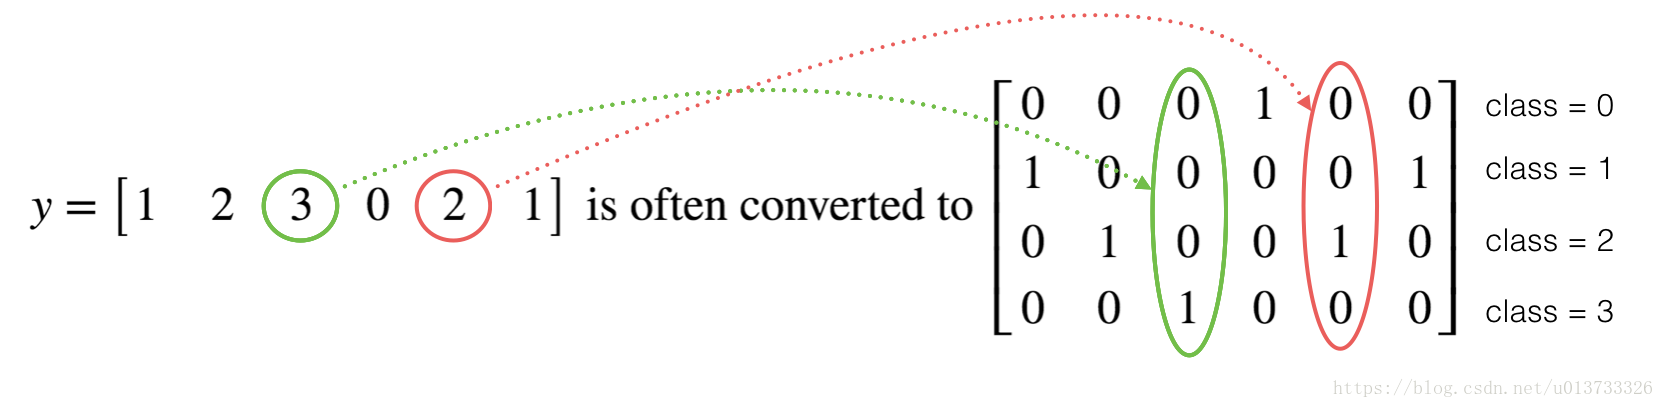
这叫做独热编码（“one hot” encoding），因为在转换后的表示中，每列的一个元素是"hot"（意思是设置为1）。要在numpy中进行这种转换，可能需要编写几行代码。在TensorFlow中，只需要使用一行代码
```
tf.one_hot(labels, depth, axis)
```
下面我们要做的是取一个标签矢量和C类总数，返回一个独热编码。

In [9]:
def one_hot_matrix(lables, C):
    """
    创建一个矩阵one_hot，其中第i行对应第i个类号，第j列对应第j个训练样本
    所以如果第j个样本对应着第i个标签，那么one_hot(i,j)将会是1
    参数：
        labels - 标签向量
        C - 分类数
    返回：
        one_hot - 独热矩阵
    """
    # 创建一个固定值 赋值为C
    C = tf.constant(C, name="C")
    
    # 使用tf.one_hot 注意以下axis
    one_hot_matrix = tf.one_hot(indices = lables, depth = C, axis = 0)
    
    # 创建一个session
    sess = tf.Session()
    
    # 运行session
    one_hot = sess.run(one_hot_matrix)
    
    # 关闭session
    sess.close()
    
    return one_hot

# 测试one_hot_matrix()
labels = np.array([1, 2, 3, 0, 2, 1])
one_hot = one_hot_matrix(labels, 4)
print(str(one_hot))

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


### 1.5 - 初始化为0和1
使用0或者1初始化一个向量，要用到`tf.ones()`和`tf.zeros()`，给定函数一个维度值，将会返回全是1或0的满足条件的矩阵

In [10]:
def ones(shape):
    """
    创建一个维度为shape的变量，其值全为1
    参数：
        shape - 要创建矩阵的维度
    返回：
        ones - 只包含1的数组
    """
    ones = tf.ones(shape)
    sess = tf.Session()
    ones = sess.run(ones)
    sess.close()
    
    return ones

# 测试ones()
print("ones = " + str(ones([3])))
print("ones = " + str(ones((3, 4))))

ones = [1. 1. 1.]
ones = [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


## 2. 使用TensorFlow构建第一个神经网络
使用TensorFlow构建一个神经网络，实现模型需要以下两个步骤：
1. 创建计算图
2. 运行计算图

### 2.0 - 要解决的问题
一天下午，我们和一些朋友决定教我们的电脑破译手语。我们花了几个小时在白色的墙壁前拍照，于是就有了以下数据集。现在，你的任务是建立一个算法，使有语音障碍的人与不懂手语的人交流。

* 训练集：有从0到5的数字的1080张图片(64x64像素)，每个数字拥有180张图片。
* 测试集：有从0到5的数字的120张图片(64x64像素)，每个数字拥有5张图片。

需要注意的是这是完整数据集的一个子集，完整的数据集包含更多的符号。

下面是每个数字的样本，以及我们如何表示标签的解释。这些都是原始图片，我们实际上用的是64 * 64像素的图片。
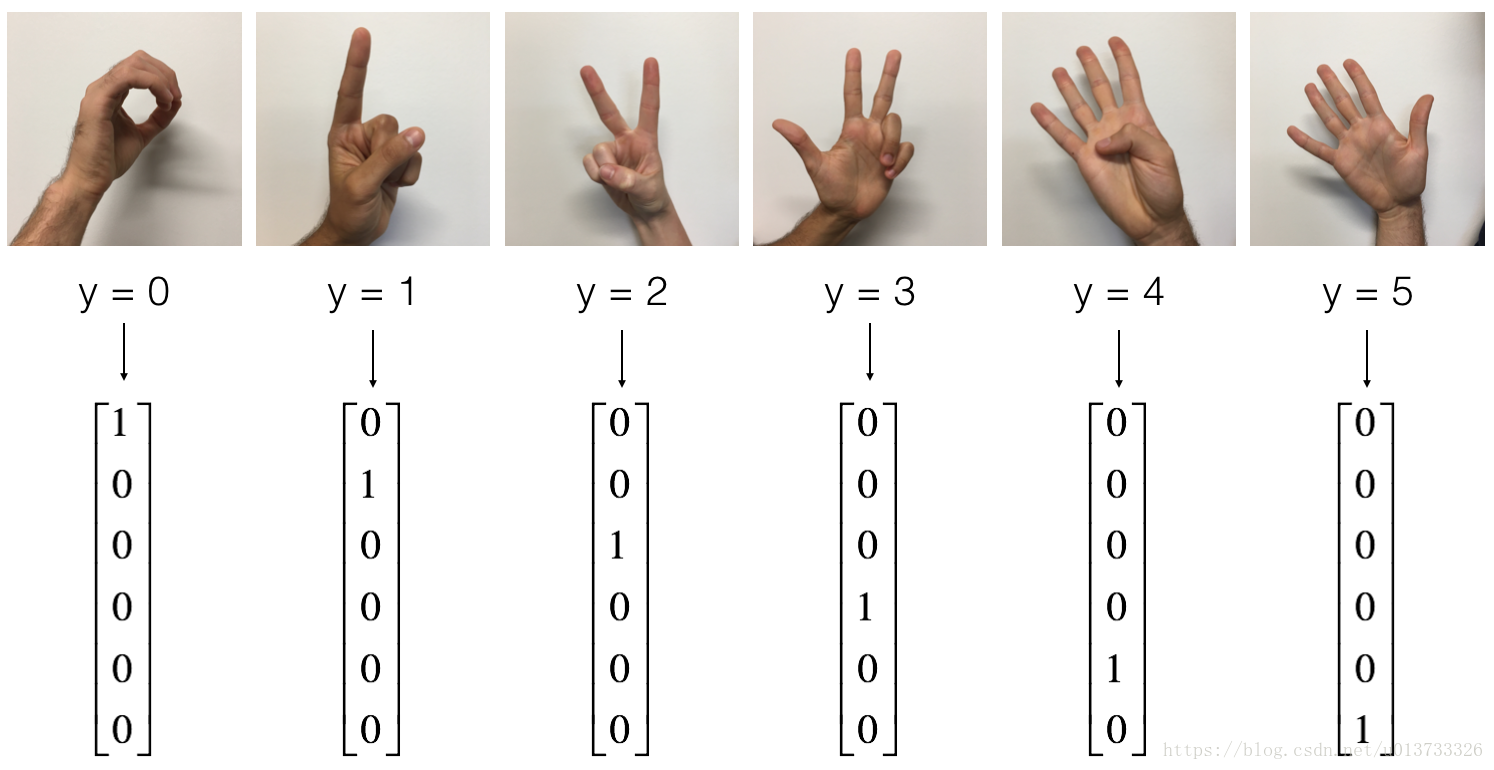

Y = 1


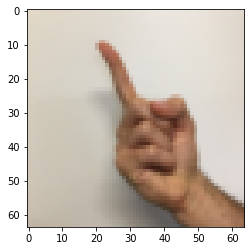

In [11]:
# 加载数据集
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = tf_utils.load_dataset()

# 查看数据集里有什么
index = 11
plt.imshow(X_train_orig[index])
print("Y = " + str(np.squeeze(Y_train_orig[:, index])))

In [13]:
print(X_train_orig.shape)
print(Y_train_orig.shape)

(1080, 64, 64, 3)
(1, 1080)


In [14]:
# 扁平化数据
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

# 归一化数据
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

# 转换为one-hot矩阵
Y_train = tf_utils.convert_to_one_hot(Y_train_orig, 6)
Y_test = tf_utils.convert_to_one_hot(Y_test_orig, 6)

print("训练集样本数 = " + str(X_train.shape[1]))
print("测试集样本数 = " + str(X_test.shape[1]))
print("X_train.shape: " + str(X_train.shape))
print("Y_train.shape: " + str(Y_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("Y_test.shape: " + str(Y_test.shape))

训练集样本数 = 1080
测试集样本数 = 120
X_train.shape: (12288, 1080)
Y_train.shape: (6, 1080)
X_test.shape: (12288, 120)
Y_test.shape: (6, 120)


目前的模型是：LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX

### 2.1 - 创建placeholders
第一项任务是为X和Y创建占位符，这将允许我们稍后在运行Session时传递训练数据

In [15]:
def create_placeholders(n_x, n_y):
    """
    为TensorFlow会话创建占位符
    参数：
        n_x - 一个实数，图片向量的大小:(64*64*3 = 12288)
        n_y - 一个实数，分类数(从0到5, n_y = 6)
    返回：
        X - 一个数据输入的占位符，维度为[n_x, None], dtype = "float"
        Y - 一个对应输入的标签的占位符，维度为[n_y, None], dtype = "float"
    提示：
        使用None，因为它让我们可以灵活处理占位符提供的样本数量。事实上，测试/训练期间的样本数量是不同的。
    """
    X = tf.placeholder(tf.float32, [n_x, None], name = "X")
    Y = tf.placeholder(tf.float32, [n_y, None], name = "Y")
    
    return X, Y

# 测试create_placeholders()
X, Y = create_placeholders(12288, 6)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X_3:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(6, ?), dtype=float32)


### 2.2 初始化参数
初始化TensorFlow中的参数，我们将使用`xavier_initializer`来初始化权重，用`xavier_initializer`来初始化偏差

注：`tf.Variable()`每次都在创建新对象，对于`get_Variable()`来说，对于已经创建的变量对象，就把那个对象返回，如果没有创建变量对象的话，就创建一个新的。

In [16]:
def initialize_parameters():
    """
    初始化神经网络的参数，参数的维度如下
        W1 : [25, 12288]
        b1 : [25, 1]
        W2 : [12, 25]
        b2 : [12, 1]
        W3 : [6, 12]
        b3 : [6, 1]
    返回：
        parameters - 包含了W和b的字典
    """
    tf.set_random_seed(1)
    
    W1 = tf.get_variable("W1",[25,12288],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [25, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer = tf.zeros_initializer())
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    return parameters

# 测试initialize_parameters
tf.reset_default_graph() # 用于清除默认图形堆栈并重置全局默认图形

with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


这些参数只有物理空间，还没有被赋值，这是因为没有通过session执行

### 2.3 - 向前传播
TensorFlow与Numpy实现的神经网络的不同之处，是前向传播要在`Z3`处停止，因为在TensorFlow中最后的线性输出层的输出作为计算损失函数的输入，所以不需要`A3`

In [18]:
def forward_propagation(X, parameters):
    """
    实现一个模型的前向传播，模型结构为LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    参数：
        X - 输入数据的占位符，维度为(输入节点数量，样本数量)
        parameters - 包含了W和b的参数的字典
    返回：
        Z3 - 最后一个LINEAR层的输出
    """
    W1 = parameters["W1"]
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1, X), b1)   # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                 # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)  # Z2 = np.dot(W2, A1) + b2
    A2 = tf.nn.relu(Z2)                 # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)  # Z3 = np.dot(W3, A2) + b3
    
    return Z3

# 测试forward_propagation
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


### 2.4 - 计算成本
```python
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))
```

In [19]:
def compute_cost(Z3, Y):
    """
    计算成本
    参数：
        Z3 - 前向传播的结果
        Y - 标签，一个占位符，和Z3的维度相同
    返回：
        cost - 成本值
    """
    logits = tf.transpose(Z3) #转置
    labels = tf.transpose(Y)  #转置
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    
    return cost

# 测试compute_cost
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


### 2.5 - 反向传播 &更新参数
得益于编程框架，所有反向传播和参数更新都在1行代码中处理。计算成本函数后，将创建一个“optimizer”对象。 运行tf.session时，必须将此对象与成本函数一起调用，当被调用时，它将使用所选择的方法和学习速率对给定成本进行优化。

举个例子，对于梯度下降：

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

要进行优化，应该这样做：

In [ ]:
_,c = sess.run([optimizer, cost], feed_dict={X:mini_batch_X, Y:mini_batch_Y})

编写代码时，我们经常使用`_`作为一次性变量来存储我们稍后不需要使用的值。 这里，`_`具有我们不需要的优化器的评估值。

### 2.6 构建模型

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:103: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


epoch = 0    epoch_cost = 1.8557019089207507
epoch = 100    epoch_cost = 1.017255246639252
epoch = 200    epoch_cost = 0.7331836909958809
epoch = 300    epoch_cost = 0.573070616433115
epoch = 400    epoch_cost = 0.4685733611836577
epoch = 500    epoch_cost = 0.38122752534620685
epoch = 600    epoch_cost = 0.3138153413028428
epoch = 700    epoch_cost = 0.2537078437480059
epoch = 800    epoch_cost = 0.20390024713494553
epoch = 900    epoch_cost = 0.16645374149084088
epoch = 1000    epoch_cost = 0.14663576695955163
epoch = 1100    epoch_cost = 0.10728540711782196
epoch = 1200    epoch_cost = 0.08669923347505656
epoch = 1300    epoch_cost = 0.05934691474293216
epoch = 1400    epoch_cost = 0.05224314478762222


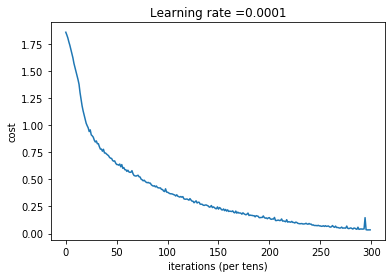

参数已经保存到session。
训练集的准确率： 0.9990741
测试集的准确率: 0.725
CPU的执行时间 = 389.1846809000001 秒


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:107: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [20]:
def model(X_train,Y_train,X_test,Y_test,
		learning_rate=0.0001,num_epochs=1500,minibatch_size=32,
		print_cost=True,is_plot=True):
    """
    实现一个三层的TensorFlow神经网络：LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX
    
    参数：
        X_train - 训练集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 1080）
        Y_train - 训练集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 1080）
        X_test - 测试集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 120）
        Y_test - 测试集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 120）
        learning_rate - 学习速率
        num_epochs - 整个训练集的遍历次数
        mini_batch_size - 每个小批量数据集的大小
        print_cost - 是否打印成本，每100代打印一次
        is_plot - 是否绘制曲线图
    
    返回：
        parameters - 学习后的参数

    """
    ops.reset_default_graph()                #能够重新运行模型而不覆盖tf变量
    tf.set_random_seed(1)
    seed = 3
    (n_x , m)  = X_train.shape               #获取输入节点数量和样本数
    n_y = Y_train.shape[0]                   #获取输出节点数量
    costs = []                               #成本集
    
    #给X和Y创建placeholder
    X,Y = create_placeholders(n_x,n_y)
    
    #初始化参数
    parameters = initialize_parameters()
    
    #前向传播
    Z3 = forward_propagation(X,parameters)
    
    #计算成本
    cost = compute_cost(Z3,Y)
    
    #反向传播，使用Adam优化
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    #初始化所有的变量
    init = tf.global_variables_initializer()
    
    #开始会话并计算
    with tf.Session() as sess:
        #初始化
        sess.run(init)
        
        #正常训练的循环
        for epoch in range(num_epochs):
            
            epoch_cost = 0  #每代的成本
            num_minibatches = int(m / minibatch_size)    #minibatch的总数量
            seed = seed + 1
            minibatches = tf_utils.random_mini_batches(X_train,Y_train,minibatch_size,seed)
            
            for minibatch in minibatches:
                
                #选择一个minibatch
                (minibatch_X,minibatch_Y) = minibatch
                
                #数据已经准备好了，开始运行session
                _ , minibatch_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
                
                #计算这个minibatch在这一代中所占的误差
                epoch_cost = epoch_cost + minibatch_cost / num_minibatches
                
            #记录并打印成本
            ## 记录成本
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                #是否打印：
                if print_cost and epoch % 100 == 0:
                        print("epoch = " + str(epoch) + "    epoch_cost = " + str(epoch_cost))
        
        #是否绘制图谱
        if is_plot:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()
        
        #保存学习后的参数
        parameters = sess.run(parameters)
        print("参数已经保存到session。")
        
        #计算当前的预测结果
        correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(Y))
        
        #计算准确率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))
        
        print("训练集的准确率：", accuracy.eval({X: X_train, Y: Y_train}))
        print("测试集的准确率:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

#开始时间
start_time = time.clock()
#开始训练
parameters = model(X_train, Y_train, X_test, Y_test)
#结束时间
end_time = time.clock()
#计算时差
print("CPU的执行时间 = " + str(end_time - start_time) + " 秒" )

  现在，我们的算法已经可以识别0-5的手势符号了，准确率在72.5%。

  我们的模型看起来足够大了，可以适应训练集，但是考虑到训练与测试的差异，你也完全可以尝试添加L2或者dropout来减少过拟合。将session视为一组代码来训练模型，在每个minibatch上运行会话时，都会训练我们的参数，总的来说，你已经运行了很多次（1500代），直到你获得训练有素的参数。

### 2.7 - 测试你自己的图片（选做）

预测结果: y = 5


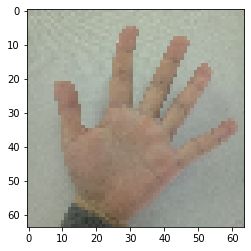

In [22]:
import matplotlib.pyplot as plt # plt 用于显示图片
import matplotlib.image as mpimg # mpimg 用于读取图片
import numpy as np

my_image1 = "5.png"                                            #定义图片名称
fileName1 = "datasets/fingers/" + my_image1                      #图片地址
image1 = mpimg.imread(fileName1)                               #读取图片
plt.imshow(image1)                                             #显示图片
my_image1 = image1.reshape(1,64 * 64 * 3).T                    #重构图片
my_image_prediction = tf_utils.predict(my_image1, parameters)  #开始预测
print("预测结果: y = " + str(np.squeeze(my_image_prediction)))